# Erstellung eines Python-Scripts zur Datenanalyse

#### Autorin: Britta Lelgemann
#### Aufgabe: Analyse von offenen Datensätzen der Seattle Public Library

* Frage 1: Wieviele E-Books wurden im Jahr 2019 im Vergleich zu physischen Büchern ausgeliehen?
* Frage 2: Wieviele digitale Medien wurden insgesamt im Jahr 2019 im Vergleich zu physischen Medien ausgeliehen?
* Frage 3: Wieviele digitale Medien wurden im April 2019 im Vergleich zu April 2020 ausgeliehen?
* Frage 4: Welches Medium wurde 2019 am meisten ausgeliehen?
* Frage 5: Wie haben sich die Ausleihen über die Jahre verteilt?

## Vorbereitung der Datenanalyse

In [178]:
# Import des Packages "urllib" und des Moduls "request": 
import urllib.request
# Import von Pandas und Festlegung eines Alias: 
import pandas as pd 
# Import des Packages "matplotlib" und des Moduls "pyplot":
import matplotlib.pyplot as plt

In [179]:
# Angabe der URls, wo die Daten zu finden sind: 
url_2019 = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
url_2019_apr = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutmonth=4%20and%20checkoutyear=2019&$limit=500000"
url_2020_apr = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutmonth=4%20and%20checkoutyear=2020&$limit=500000" 
# Erstellen von Dateien, in die die Daten gespeichert werden sollen & Festlegung von Variablen:
checkouts_file_2019 = "checkouts_2019.csv"
checkouts_file_2019apr = "checkouts_2019apr.csv"
checkouts_file_2020apr = "checkouts_2020apr.csv"

In [180]:
# Download der Daten mit der Funktion "urlretrieve" aus der urllib-library und dem Modul "request":
urllib.request.urlretrieve(url_2019, checkouts_file_2019)

('checkouts_2019.csv', <http.client.HTTPMessage at 0x14ed0d62048>)

In [181]:
urllib.request.urlretrieve(url_2019_apr, checkouts_file_2019apr)

('checkouts_2019apr.csv', <http.client.HTTPMessage at 0x14ed0d10988>)

In [182]:
urllib.request.urlretrieve(url_2020_apr, checkouts_file_2020apr)

('checkouts_2020apr.csv', <http.client.HTTPMessage at 0x14ed0d0ba08>)

In [183]:
# Die Daten mit Pandas ausgeben und diesen Befehl in einer Variablen ablegen:
checkouts_2019 = pd.read_csv(checkouts_file_2019)
checkouts_2019apr = pd.read_csv(checkouts_file_2019apr)
checkouts_2020apr = pd.read_csv(checkouts_file_2020apr)

In [184]:
# Tabellen anzeigen lassen:
checkouts_2019

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.
2,Physical,Horizon,BOOK,2019,12,1,Vernon Subutex : roman. Tome 1 / Virginie Desp...,"Despentes, Virginie, 1969-","Music stores France Paris Fiction, Businessmen...",Grasset : Les Éditions Graset & Fasquelle : Li...,janvier 2018.
3,Physical,Horizon,BOOK,2019,12,1,The lost Gospel of Mary : the Mother of Jesus ...,NaN,Mary Blessed Virgin Saint,"Paraclete Press,",[2007]
4,Digital,OverDrive,EBOOK,2019,12,2,"Be Mine Forever: Bennetts Series, Book 3",Kennedy Ryan,"Fiction, Literature, Romance","Hachette Digital, Inc.",2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2019,12,2,A history of the gypsies of Eastern Europe and...,"Crowe, David","Romanies Russia Federation History, Romanies R...","Palgrave Macmilan/St. Martin's Griffin,",2007.
9996,Digital,OverDrive,EBOOK,2019,12,1,"The Apostle: Scot Harvath Series, Book 8",Brad Thor,"Fiction, Thriller","Simon & Schuster, Inc.",2014
9997,Physical,Horizon,BOOK,2019,12,1,Bats in the band / written and illustrated by ...,"Lies, Brian","Bats Juvenile fiction, Music Juvenile fiction,...","Houghton Mifflin Harcourt,",[2014]
9998,Physical,Horizon,BOOK,2019,12,1,Silver girl : a novel / Elin Hilderbrand.,"Hilderbrand, Elin","Female friendship Fiction, Women Massachusetts...","Little, Brown and Co.,",2011.


In [185]:
checkouts_2019apr

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,SOUNDDISC,2019,4,2,In flux / Ravi Coltrane.,"Coltrane, Ravi","Jazz 2001 2010, Saxophone music Jazz","Savoy Jazz,",[2005]
1,Digital,OverDrive,EBOOK,2019,4,3,"Royal Airs: Elemental Blessings Series, Book 2",Sharon Shinn,"Fantasy, Fiction, Romance","Penguin Group (USA), Inc.",2013
2,Physical,Horizon,SOUNDDISC,2019,4,1,Hometowns / the Rural Alberta Advantage.,Rural Alberta Advantage (Musical group),Rock music 2001 2010,"Saddle Creek,",[2009]
3,Digital,OverDrive,EBOOK,2019,4,3,The Cat Who Went Up the Creek: The Cat Who Ser...,Lilian Jackson Braun,"Fiction, Mystery","Penguin Group (USA), Inc.",2011
4,Digital,OverDrive,EBOOK,2019,4,5,"Flower Net: Red Princess Mystery Series, Book 1",Lisa See,"Fiction, Mystery, Thriller","Random House, Inc.",2010
...,...,...,...,...,...,...,...,...,...,...,...
216175,Physical,Horizon,BOOK,2019,4,1,The simple truths of service : inspired by Joh...,"Blanchard, Kenneth H.","Customer services, Consumer satisfaction","Simple Truths, an imprint of Sourcebooks, Inc,",[2017]
216176,Digital,OverDrive,AUDIOBOOK,2019,4,1,My Life as a Traitor (Unabridged),Zarah Ghahramani,"Biography & Autobiography, Nonfiction","Blackstone Audio, Inc.",2008
216177,Physical,Horizon,BOOK,2019,4,3,Birds : nature's magnificent flying machines /...,"Arnold, Caroline",Birds Flight Juvenile literature,"Charlesbridge,",[2003]
216178,Physical,Horizon,BOOK,2019,4,1,"Xiao mao diao yu / Jin Jin, zhu.","Jin, Jin (Children's book author)","Childrens stories Chinese, Short stories Chine...","Xian dai chu ban she,",2013.


In [186]:
checkouts_2020apr

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2020,4,3,A Dilly of a Death: China Bayles Mystery Serie...,Susan Wittig Albert,"Fiction, Mystery","Penguin Group (USA), Inc.",2011
1,Digital,OverDrive,AUDIOBOOK,2020,4,17,The Second Sleep: A novel (unabridged) (Unabri...,Robert Harris,"Fiction, Suspense, Thriller",Books on Tape,2019
2,Digital,OverDrive,EBOOK,2020,4,2,My Fate According to the Butterfly,Gail Villanueva,"Juvenile Fiction, Juvenile Literature","Scholastic, Inc. (US)",2019
3,Digital,OverDrive,AUDIOBOOK,2020,4,1,A Death in the Family (Unabridged),James Agee,"Classic Literature, Fiction","Blackstone Audio, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,4,4,"The Black Moth: Historical Romances Series, Bo...",Georgette Heyer,"Fiction, Historical Fiction, Literature, Romance",Sourcebooks,2010
...,...,...,...,...,...,...,...,...,...,...,...
93666,Digital,OverDrive,EBOOK,2020,4,4,Imagining Seattle: Social Values in Urban Gove...,Serin D. Houston,"Nonfiction, Politics, Sociology",University of Nebraska Press,2019
93667,Digital,OverDrive,EBOOK,2020,4,1,Stowe Away,Blythe Rippon,"Fiction, Literature, Romance","Smashwords, Inc.",2017
93668,Digital,OverDrive,EBOOK,2020,4,1,The Why Axis: Hidden Motives and the Undiscove...,Uri Gneezy,"Business, Nonfiction, Psychology, Sociology","Hachette Digital, Inc.",2013
93669,Digital,OverDrive,EBOOK,2020,4,7,Three Weeks with Lady X,Eloisa James,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2014


## Frage 1: 
### Wieviele E-Books wurden im Jahr 2019 im Vergleich zu physischen Büchern ausgeliehen? 


In [187]:
# Ich lasse mir die Spalten des Datensatzes anzeigen, um eine Übersicht zu bekommen:
checkouts_2019.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [188]:
# Außerdem lasse ich mir die ersten zwei Zeilen der Liste anzeigen:
checkouts_2019.head(2)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.


In [189]:
# Nun lasse ich mir die Datentypen anzeigen:
checkouts_2019.dtypes

usageclass         object
checkouttype       object
materialtype       object
checkoutyear        int64
checkoutmonth       int64
checkouts           int64
title              object
creator            object
subjects           object
publisher          object
publicationyear    object
dtype: object

In [190]:
# Zeilen mit Büchern rausfiltern:
checkouts_2019_filtered = checkouts_2019.where(checkouts_2019['materialtype'] == 'BOOK')

# Die Spalte checkouts rausfiltern und summieren:
buchausleihen = checkouts_2019_filtered['checkouts'].sum()

In [191]:
buchausleihen

14925.0

In [192]:
# Zeilen mit EBooks rausfiltern:
checkouts_2019_filtered = checkouts_2019.where(checkouts_2019['materialtype'] == 'EBOOK')

# die Spalte checkouts rausfiltern und summieren
ebookausleihen = checkouts_2019_filtered['checkouts'].sum()

In [193]:
ebookausleihen

9903.0

In [194]:
gesamtausleihen = buchausleihen + ebookausleihen
gesamtausleihen

24828.0

In [195]:
# Prozentzahl von Ebooks an Gesamtausleihen EBooks und Physischen Büchern
ebookausleihen / gesamtausleihen *100

39.886418559690675

### Antwort: 

#### Es wurden insgesamt  24917 Bücher ausgeliehen und 9919 E-Books. Dh. die E-Book-Ausleihen betragen 39,8 % der Gesamtbuchausleihen.

#### Anmerkung: Dies ist nicht die tatsächliche Anzahl der Ausleihen, weil nicht alle Daten heruntergeladen wurden. Trotzdem kann man eine Tendanz erkennen.
#### --

## Frage 2: 

### Wieviele digitale Medien wurden insgesamt im Jahr 2019 im Vergleich zu physischen Medien ausgeliehen? 

In [196]:
# Zur Erinnerung: die Materialtypen haben unterschiedliche "usageclasses", 
# ... d.h. sie sind "Digital" oder "Physical":
checkouts_2019[['usageclass', 'materialtype']]

,usageclass,materialtype
0,Digital,AUDIOBOOK
1,Physical,BOOK
2,Physical,BOOK
3,Physical,BOOK
4,Digital,EBOOK
...,...,...
9995,Physical,BOOK
9996,Digital,EBOOK
9997,Physical,BOOK
9998,Physical,BOOK


In [197]:
# Ich filtere die Daten mit "where" nach den gewünschten Zeilen:

physisch_2019_filtered = checkouts_2019.where(checkouts_2019['usageclass'] == 'Physical')
digital_2019_filtered = checkouts_2019.where(checkouts_2019['usageclass'] == 'Digital')

In [198]:
# Anschließen filtere ich die Spalte checkouts heraus und summiere die Ausleihen der einzelnen Medien
physischeausleihen = physisch_2019_filtered['checkouts'].sum()
digitaleausleihen = digital_2019_filtered['checkouts'].sum()

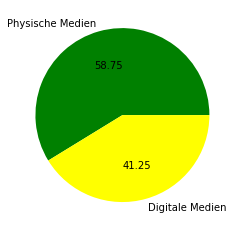

In [199]:
# Das Ergebnis stelle bzw. die prozentualen Anteile der Ausleihen stelle ich in einem Kuchendiagramm dar:

 # Farben und Beschriftung festlegen
kuchenfarben = ['green', 'yellow']
items = ['Physische Medien', 'Digitale Medien']

 # Kuchendiagramm plotten
plt.pie([physischeausleihen, digitaleausleihen], colors = kuchenfarben, labels = items, autopct='%.2f')

 # ... und anzeigen lassen
plt.show()

### Antwort:
#### 41,26 % der ausgeliehenen Medien waren digital, 58,74 physisch.
#### --

## Frage 3: 

### Wieviele digitale Medien wurden im April 2019 im Vergleich zu April 2020 ausgeliehen?

In [200]:
# Zunächst lasse ich mir die Spalten "usageclass" und "checkoutmonth" anzeigen:
checkouts_2019apr[['usageclass', 'checkoutmonth']]

,usageclass,checkoutmonth
0,Physical,4
1,Digital,4
2,Physical,4
3,Digital,4
4,Digital,4
...,...,...
216175,Physical,4
216176,Digital,4
216177,Physical,4
216178,Physical,4


In [201]:
checkouts_2020apr[['usageclass', 'checkoutmonth']]

,usageclass,checkoutmonth
0,Digital,4
1,Digital,4
2,Digital,4
3,Digital,4
4,Digital,4
...,...,...
93666,Digital,4
93667,Digital,4
93668,Digital,4
93669,Digital,4


In [202]:
# Dann filtere ich wieder die gewünschten Zeilen mit "where" heraus:

digital_2019apr_filtered = checkouts_2019apr.where(checkouts_2019apr['usageclass'] == 'Physical')
digital_2020apr_filtered = checkouts_2020apr.where(checkouts_2020apr['usageclass'] == 'Digital')

In [203]:
# ... um anschließend wieder die Spalte "checkouts" herauszufiltern und zu summieren:

digital_apr19 = digital_2019apr_filtered['checkouts'].sum()
digital_apr20 = digital_2020apr_filtered['checkouts'].sum()

In [204]:
# Ich drucke dann die Ergebnisse aus ...

print(digital_apr19)
print(digital_apr20)

487541.0
354472.0


In [205]:
# ... und stelle sie in einem Stabdiagram dar:

# ausleihen = ([digital_apr19, digital_apr20])
# plt.bar([2019,2020], ausleihen, color="pink")
# plt.show()

# -----> zeigt nicht die einfachen Jahreszahlen an! 

# Also anders:

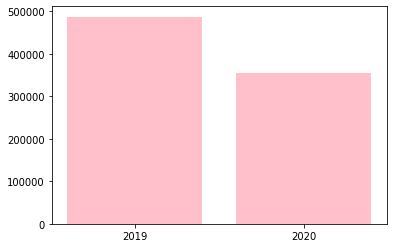

In [215]:
# Ich importiere zunächst die Programmbibliothek NumPy und lege dafür ein Alias fest:
import numpy as np

 # die Jahreszahlen der Ausleihen werden in einem String zurückgeben
years = [str(year) for year in range(2019, 2021)] 
ausleihen = ([digital_apr19, digital_apr20])
index = np.arange(len(years))
plt.bar(index, ausleihen, color="pink")
 # die labels werden zentriert, außerdem werden als ticks die Jahreszahlen angezeigt
plt.xticks(index, years) 

plt.show()

## Frage 4: 
### Welches Medium wurde im Dezember 2019 am meisten ausgeliehen?

In [207]:
# Ich lasse mir die höchste Anzahl an Ausleihen anzeigen:

checkouts_2019.checkouts.max()

560

In [208]:
# Jetzt möchte ich aber noch wissen, um welchen Titel und Materialtyp es sich dabei handelt.
# Am einfachsten ist dies, wenn ich mir die Ausleihen anzeigen lasse & sortiere:

checkouts_2019[['title', 'materialtype', 'checkouts']].sort_values(by = ["checkouts"], ascending = False)[0:10]

  # "by" gibt an, nach welcher Spalte sortiert wird
  # "ascending" bedeutet "aufsteigend" (davon will ich das Gegenteil, deshalb "ascending = False")
  # "[0:10]" zeigt die ersten 10 Zeilen an

,title,materialtype,checkouts
7536,The testaments / Margaret Atwood.,BOOK,560
313,Where the crawdads sing / Delia Owens.,BOOK,549
2157,"Girl, woman, other / Bernardine Evaristo.",BOOK,486
4738,Children of virtue and vengeance / Tomi Adeyemi.,BOOK,409
3358,Bad Blood: Secrets and Lies in a Silicon Valle...,EBOOK,261
2045,We are Puget Sound : discovering & recovering ...,BOOK,253
1558,Eleanor Oliphant Is Completely Fine: A Novel,EBOOK,191
3976,The Great Alone: A Novel,EBOOK,182
3302,Long shot / Lionsgate ; in association with Go...,VIDEODISC,168
7843,Downton Abbey / Focus Features ; Perfect World...,VIDEODISC,145


### Antwort:
#### Das Buch "The testaments" von Margaret Atwood war das Medium, das 2019 am meisten ausgeliehen wurde.
#### --

## Frage 5: 

### Wie haben sich die Ausleihen über die Jahre entwickelt?

In [209]:
# Beim Runterladen der Dateien kann man bereits die Ausleihen der jeweiligen Jahre und Monate zusammenfassen
# ---> in der URL wir dafür "$group" eingefügt, mit "$select" wird ausgewählt, was angezeigt werden soll

 # Jahre und Monate werden angezeigt:
url_jahreundmonate = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$group=checkoutmonth,checkoutyear&$select=checkoutmonth,checkoutyear,sum(checkouts)"

 # Jahre werden angezeigt:
url_jahresverteilung = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$group=checkoutyear&$select=checkoutyear,sum(checkouts)"

In [210]:
checkouts_file_jm = "checkouts_jahre-und-monate.csv"
checkouts_file_jv = "checkouts_jahresverteilung.csv"

urllib.request.urlretrieve(url_jahreundmonate, checkouts_file_jm)
urllib.request.urlretrieve(url_jahresverteilung, checkouts_file_jv)

checkouts_jm = pd.read_csv(checkouts_file_jm)
checkouts_jv = pd.read_csv(checkouts_file_jv)

In [211]:
# Zunächst lasse ich mir die Jahre und Monate anzeigen, um zu sehen, wo die Zählung genau losgeht und endet ...
# ... vorab sortiere ich dafür die Werte nach Jahr und Monat:

checkouts_jm_sorted = checkouts_jm.sort_values(by = ['checkoutyear', 'checkoutmonth'])
checkouts_jm_sorted

,checkoutmonth,checkoutyear,sum_checkouts
45,4,2005,252663
61,5,2005,401395
77,6,2005,502439
92,7,2005,343668
107,8,2005,373707
...,...,...,...
14,1,2020,817471
29,2,2020,763431
44,3,2020,616715
60,4,2020,354572


In [212]:
# Dann lasse mir die Jahresliste anzeigen:
checkouts_jv

,checkoutyear,sum_checkouts
0,2005,3798685
1,2006,6599318
2,2007,7126627
3,2008,8438486
4,2009,9135167
5,2010,8608966
6,2011,8321732
7,2012,8163046
8,2013,9057096
9,2014,9136081


In [213]:
# Ich muss die erste und letzte Zeile aussortieren, weil diese nicht das vollständige Jahr abbilden:

checkouts_jv_sorted = checkouts_jv[1:14]
checkouts_jv_sorted

,checkoutyear,sum_checkouts
1,2006,6599318
2,2007,7126627
3,2008,8438486
4,2009,9135167
5,2010,8608966
6,2011,8321732
7,2012,8163046
8,2013,9057096
9,2014,9136081
10,2015,9084179


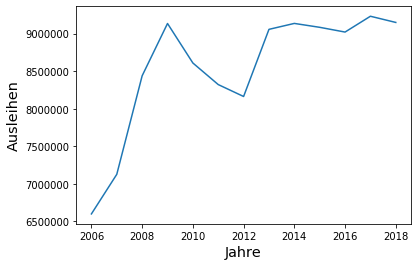

In [214]:
# Dann erstelle ich ein Histogramm:

 # zunächst erstelle ich die Variablen x (für die x-Achse) und y (für die y-Achse) 
x = checkouts_jv_sorted['checkoutyear'].values
y = checkouts_jv_sorted['sum_checkouts'].values

 # dann bestimme ich die Beschriftung
plt.ylabel("Ausleihen", size="x-large")
plt.xlabel("Jahre", size="x-large")

 # zum Schluss plotte ich die Daten und zeige sie 
plt.plot(x, y)
plt.show()